<a href="https://colab.research.google.com/github/pcbrom/perceptron-mlp-cnn/blob/main/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diagnóstico de Diabetes com Redes Neurais**

Nesta atividade, vamos trabalhar com um problema aplicado de **classificação binária**: prever se uma pessoa possui ou não diabetes com base em um conjunto de variáveis clínicas.

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

## **Contexto**

- O dataset utilizado é o **Pima Indians Diabetes Dataset**, coletado originalmente pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos.
- Ele contém registros de mulheres com pelo menos 21 anos de idade da população Pima, um grupo étnico nativo norte-americano com alta incidência de diabetes tipo 2.

## **Objetivo**

O objetivo é treinar uma MLP para prever a presença de diabetes a partir de atributos fisiológicos e laboratoriais.

## **Variáveis de entrada**

Cada observação contém os seguintes atributos:

1. **Pregnancies**, number of times pregnant: Variável discreta.
2. **Glucose**, plasma glucose concentration after 2 hours in an oral glucose tolerance test: Variável contínua.
3. **BloodPressure**, diastolic blood pressure, in mm Hg: Variável contínua.
4. **SkinThickness**, triceps skin fold thickness, in mm: Variável contínua.
5. **Insulin**, 2-hour serum insulin, in μU/mL: Variável contínua.
6. **BMI**, body mass index, weight in kg/(height in m)²: Variável contínua.
7. **DiabetesPedigreeFunction**, family history function: Variável contínua.
8. **Age**, in years: : Variável discreta.

## **Variáveis de saída (Target)**

- **Outcome = 1**: Diabetic
- **Outcome = 0**: Non-diabetic


# **Arquitetura da Rede Neural e Procedimentos Adotados**

---

## **Arquitetura da rede**

A estrutura da rede foi definida como:

- **Entrada**: $8$ variáveis de entrada (padronizadas).
- **1ª camada oculta**: $6$ neurônios com ativação $\phi(z)$.
- **2ª camada oculta**: $3$ neurônios com ativação $\phi(z)$.
- **Camada de saída**: $2$ neurônios com ativação **Softmax**, representando as probabilidades associadas a cada classe (saída codificada em one-hot)

## **Funções de Ativação**

- Nas **camadas ocultas**, utilizamos a função Rectified Linear Unit (**ReLU**):
  $$
  \phi(z) = \max(0, z),
  $$
  computacionalmente eficiente e ajuda a evitar o problema de saturação presente em funções como a sigmoide.

- Na **camada de saída**, utilizamos a função **Softmax**:
  $$
  \text{softmax}(z_j) = \frac{e^{z_j}}{\sum_{k} e^{z_k}}
  $$

## **Função de Custo**

Como a saída está codificada em **one-hot**, adotamos a **cross-entropy categórica** como função de custo:
$$
\mathcal{L}(y, \hat{y}) = - \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^{2} y_{ij} \log(\hat{y}_{ij})
$$

## **Procedimento de Otimização**

O treinamento foi realizado utilizando o algoritmo de **descida do gradiente clássica (batch)**:

- Os gradientes foram computados por meio do algoritmo de **backpropagation**. Os pesos foram atualizados de forma simultânea com base no erro de todo o conjunto de treino, com taxa de aprendizado $\eta$.

## **Tratamento dos Dados**

Antes do treinamento, os dados foram processados da seguinte forma:

- **Remoção de entradas inválidas**, com valores zero biologicamente implausíveis.
- **Padronização** das variáveis de entrada via z-score.
- **Codificação one-hot** da target (binária).
- **Divisão em conjuntos** de treino (70%), validação (15%) e teste (15%).

## **Avaliação**

Durante o treinamento, foram monitoradas:

- A **função de perda** (cross-entropy) em treino e validação.
- A **acurácia** em ambos os conjuntos.

Após o treinamento, o modelo foi avaliado no **conjunto de teste** por meio de:
- Matriz de confusão apresentando métricas de acurácia, precisão, recall e $F_1$-score.


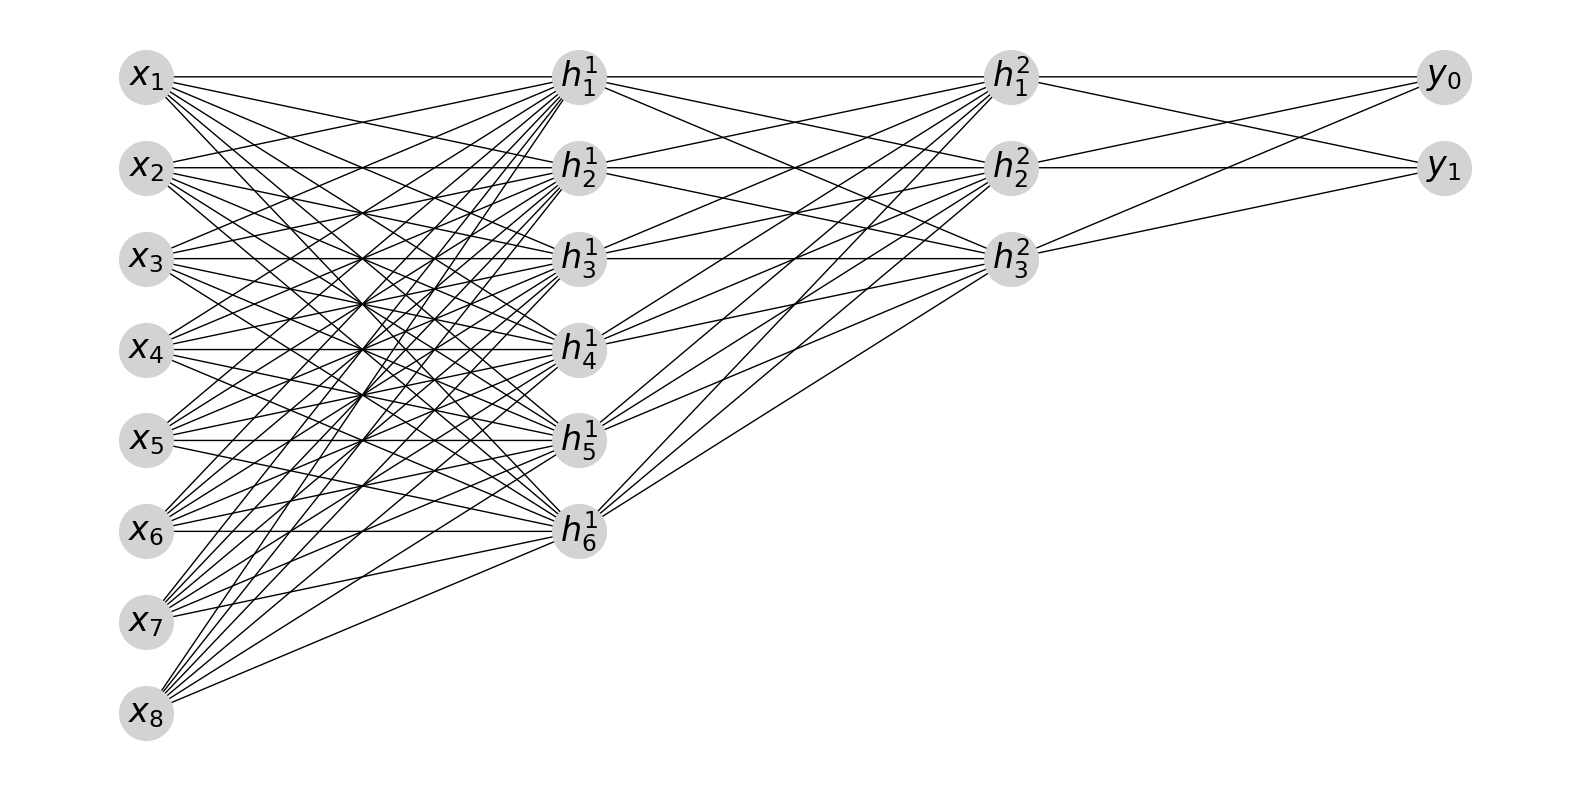

In [1]:
# @title MLP com ReLU nas camadas ocultas e Softmax na saída (2 camadas ocultas)

import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo direcionado
G = nx.DiGraph()

# Camadas conforme a descrição
input_layer = [f'x_{i+1}' for i in range(8)]
hidden_layer1 = [f'h^1_{i+1}' for i in range(6)]
hidden_layer2 = [f'h^2_{i+1}' for i in range(3)]
output_layer = ['{y}_0', '{y}_1']

# Lista de camadas
layers = [input_layer, hidden_layer1, hidden_layer2, output_layer]
positions = {}
labels = {}
layer_dist = 2.0
node_dist = 1.0

# Posicionamento dos nós
for i, layer in enumerate(layers):
    for j, node in enumerate(layer):
        G.add_node(node)
        positions[node] = (i * layer_dist, -j * node_dist)
        labels[node] = f"${node}$"

# Conectar camadas
def connect_layers(layer1, layer2):
    for u in layer1:
        for v in layer2:
            G.add_edge(u, v)

connect_layers(input_layer, hidden_layer1)
connect_layers(hidden_layer1, hidden_layer2)
connect_layers(hidden_layer2, output_layer)

# Desenho
plt.figure(figsize=(16, 8))
nx.draw_networkx_nodes(G, positions, node_color='lightgray', node_size=1500)
nx.draw_networkx_edges(G, positions, arrows=True, arrowstyle='-|>', width=1)
nx.draw_networkx_labels(G, positions, labels, font_size=24)
# plt.title('Arquitetura: Entrada (8) → Oculta1 (6, ReLU) → Oculta2 (3, ReLU) → Saída (2, Softmax)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
# @title Importação dos dados
import pandas as pd

# URLs dos dados
url_train = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/train.csv"
url_validation = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/validation.csv"
url_test = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/test.csv"

# Leitura dos dados e seleção das 9 primeiras colunas
df_train = pd.read_csv(url_train).iloc[:, :9]
df_validation = pd.read_csv(url_validation).iloc[:, :9]
df_test = pd.read_csv(url_test).iloc[:, :9]

# Verificar dimensões
print(f"Shape do train: {df_train.shape}")
print(f"Shape do validation: {df_validation.shape}")
print(f"Shape do test: {df_test.shape}")

# Visualizar as primeiras linhas
display(df_train.head(3))

# Verificar estatísticas básicas
display(df_train.describe())
display(df_validation.describe())
display(df_test.describe())

Shape do train: (274, 9)
Shape do validation: (59, 9)
Shape do test: (59, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,104,64,37,64,33.6,0.510,22,1
1,3,129,64,29,115,26.4,0.219,28,1
2,6,92,62,32,126,32.0,0.085,46,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,3.281022,123.164234,70.970803,29.215328,155.981752,33.222628,0.528117,30.598540,0.332117
std,3.273471,30.585352,12.000880,10.546999,121.968394,7.005466,0.348254,10.181834,0.471834
min,0.000000,56.000000,30.000000,8.000000,14.000000,19.300000,0.085000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,22.000000,77.000000,28.700000,0.284250,23.250000,0.000000
50%,2.000000,121.000000,72.000000,29.000000,120.000000,33.200000,0.457000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.000000,190.000000,37.100000,0.684750,34.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,3.406780,122.728814,70.203390,28.677966,158.728814,33.840678,0.582864,31.508475,0.338983
std,3.173808,30.863342,12.772249,10.309755,108.669513,7.802080,0.361479,9.662178,0.477427
min,0.000000,74.000000,38.000000,7.000000,36.000000,20.800000,0.088000,21.000000,0.000000
25%,1.000000,97.500000,61.000000,20.500000,84.500000,28.100000,0.342500,23.000000,0.000000
50%,3.000000,117.000000,70.000000,27.000000,130.000000,33.600000,0.528000,28.000000,0.000000
75%,6.000000,146.500000,78.000000,36.000000,191.000000,38.450000,0.727500,39.500000,1.000000
max,12.000000,188.000000,110.000000,51.000000,540.000000,57.300000,2.137000,58.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,3.288136,120.033898,69.694915,29.288136,153.728814,31.698305,0.439678,31.457627,0.322034
std,3.000292,32.504093,14.492869,10.743163,115.619297,6.200486,0.303825,10.910801,0.471267
min,0.000000,68.000000,24.000000,7.000000,18.000000,18.200000,0.128000,21.000000,0.000000
25%,1.000000,96.000000,62.000000,19.000000,70.500000,26.250000,0.232000,23.000000,0.000000
50%,2.000000,112.000000,70.000000,32.000000,135.000000,32.800000,0.356000,26.000000,0.000000
75%,5.000000,137.500000,80.000000,38.000000,191.000000,35.800000,0.584000,37.500000,1.000000
max,12.000000,197.000000,102.000000,49.000000,543.000000,47.900000,1.400000,60.000000,1.000000


In [3]:
# @title Padronização antes da divisão e One-Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar variáveis explicativas e alvo
X_train = df_train.drop("Outcome", axis=1).values
y_train = df_train["Outcome"].values.reshape(-1, 1)

X_val = df_validation.drop("Outcome", axis=1).values
y_val = df_validation["Outcome"].values.reshape(-1, 1)

X_test = df_test.drop("Outcome", axis=1).values
y_test = df_test["Outcome"].values.reshape(-1, 1)

# Padronizar (z-score) - Ajustar no conjunto de treino e aplicar nos outros
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta no treino

# Usar o mesmo scaler para transformar val e test
X_val = scaler.transform(X_val)  # Usa o mesmo scaler
X_test = scaler.transform(X_test)  # Usa o mesmo scaler

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)  # Usar o mesmo encoder
y_test = encoder.transform(y_test)  # Usar o mesmo encoder

# Verificações
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}\n")


Tamanho do conjunto de treino: 274
Tamanho do conjunto de validação: 59
Tamanho do conjunto de teste: 59



In [4]:
# Hiperparâmetros
eta = 0.0001
epochs = 1500

Epoch 0 | Train Loss: 1.7483 | Val Loss: 1.3963
Epoch 100 | Train Loss: 0.5474 | Val Loss: 0.5096
Epoch 200 | Train Loss: 0.5247 | Val Loss: 0.4796
Epoch 300 | Train Loss: 0.5103 | Val Loss: 0.4610
Epoch 400 | Train Loss: 0.5018 | Val Loss: 0.4526
Epoch 500 | Train Loss: 0.4953 | Val Loss: 0.4473
Epoch 600 | Train Loss: 0.4910 | Val Loss: 0.4433
Epoch 700 | Train Loss: 0.4876 | Val Loss: 0.4395
Epoch 800 | Train Loss: 0.4848 | Val Loss: 0.4371
Epoch 900 | Train Loss: 0.4821 | Val Loss: 0.4361
Epoch 1000 | Train Loss: 0.4797 | Val Loss: 0.4363
Epoch 1100 | Train Loss: 0.4772 | Val Loss: 0.4363
Epoch 1200 | Train Loss: 0.4745 | Val Loss: 0.4361
Epoch 1300 | Train Loss: 0.4720 | Val Loss: 0.4365
Epoch 1400 | Train Loss: 0.4694 | Val Loss: 0.4370


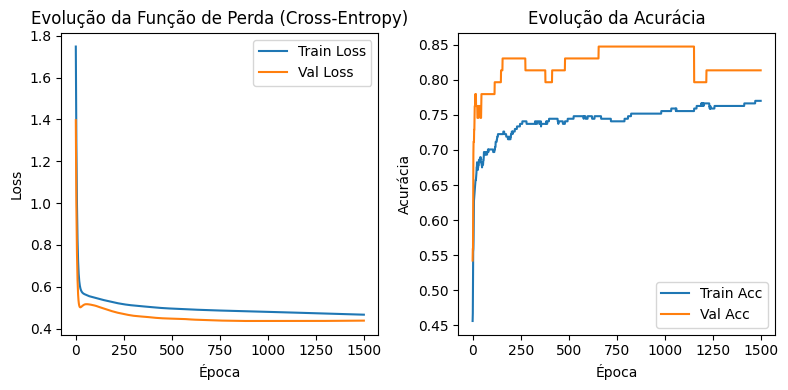

Acurácia no conjunto de teste: 0.8475


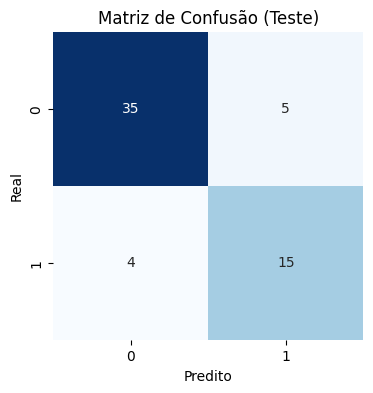


Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8974    0.8750    0.8861        40
           1     0.7500    0.7895    0.7692        19

    accuracy                         0.8475        59
   macro avg     0.8237    0.8322    0.8277        59
weighted avg     0.8500    0.8475    0.8484        59

Peso final W1[0,0]: 0.8020623208831619


In [5]:
# @title MLP com ReLU nas camadas ocultas e Softmax na saída (2 camadas ocultas) DG

import numpy as np
import matplotlib.pyplot as plt

# Arquitetura
n_input = X_train.shape[1]
n_hidden1 = 6
n_hidden2 = 3
n_output = 2  # saída one-hot

# Funções de ativação
def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

def softmax(z):
    z_stable = z - np.max(z, axis=1, keepdims=True)  # estabilidade numérica
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_hat, y_true):
    eps = 1e-10
    return -np.mean(np.sum(y_true * np.log(y_hat + eps), axis=1))

# Inicialização
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden1)
b1 = np.zeros((1, n_hidden1))
W2 = np.random.randn(n_hidden1, n_hidden2)
b2 = np.zeros((1, n_hidden2))
W3 = np.random.randn(n_hidden2, n_output)
b3 = np.zeros((1, n_output))

# Histórico
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(epochs):
    # --- Forward (treino)
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    A3 = softmax(Z3)

    # --- Forward (validação)
    Z1v = X_val @ W1 + b1
    A1v = relu(Z1v)
    Z2v = A1v @ W2 + b2
    A2v = relu(Z2v)
    Z3v = A2v @ W3 + b3
    A3v = softmax(Z3v)

    # --- Loss
    train_loss = cross_entropy(A3, y_train)
    val_loss = cross_entropy(A3v, y_val)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

    # --- Acurácia
    train_pred = np.argmax(A3, axis=1)
    val_pred = np.argmax(A3v, axis=1)
    train_acc = np.mean(train_pred == np.argmax(y_train, axis=1))
    val_acc = np.mean(val_pred == np.argmax(y_val, axis=1))
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    # --- Backpropagation
    dZ3 = (A3 - y_train)  # derivada da softmax + cross-entropy
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = (dZ3 @ W3.T) * drelu(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = (dZ2 @ W2.T) * drelu(Z1)
    dW1 = X_train.T @ dZ1 # usa todos os dados simultaneamente
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # --- Atualização
    W3 -= eta * dW3
    b3 -= eta * db3
    W2 -= eta * dW2
    b2 -= eta * db2
    W1 -= eta * dW1
    b1 -= eta * db1

    # Log ocasional
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# --- Gráficos
plt.figure(figsize=(8, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title('Evolução da Função de Perda (Cross-Entropy)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title('Evolução da Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Forward no conjunto de teste
Z1t = X_test @ W1 + b1
A1t = relu(Z1t)
Z2t = A1t @ W2 + b2
A2t = relu(Z2t)
Z3t = A2t @ W3 + b3
A3t = softmax(Z3t)

# Predição: classe com maior probabilidade
y_pred_test = np.argmax(A3t, axis=1)
y_true_test = np.argmax(y_test, axis=1)

# Acurácia
acc_test = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc_test:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Relatório completo (opcional)
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))

if epoch == epochs - 1:
    print("Peso final W1[0,0]:", W1[0, 0])


In [7]:
# Testando
def predict_single(glucose, age, imc, scaler):
    """
    Faz a predição de uma única amostra usando a rede MLP treinada.

    Parâmetros:
        glucose (float): Valor de glicose.
        age (float): Idade.
        imc (float): Índice de Massa Corporal.
        scaler: Objeto de normalização usado no treino (ex: StandardScaler).

    Retorna:
        classe_predita (int): Classe com maior probabilidade.
        probabilidade (array): Vetor de probabilidades da saída softmax.
    """
    # Aqui, as 3 variáveis são passadas e as demais variáveis são assumidas como zero ou valor fixo.
    x_input = np.array([[glucose, age, imc] + [0] * (X_train.shape[1] - 3)])  # Preenche com zeros

    # Normalização
    x_input_scaled = scaler.transform(x_input)

    # Forward pass
    z1 = x_input_scaled @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    z3 = a2 @ W3 + b3
    a3 = softmax(z3)

    # Predição
    predicted_class = np.argmax(a3)
    return predicted_class, a3[0]

from sklearn.preprocessing import StandardScaler

# Teste do novo paciente
glucose = 120
age = 31.5
imc = 31.7

classe, prob = predict_single(glucose, age, imc, scaler)
print(f"Classe predita: {classe} | Probabilidades: {prob}")

Classe predita: 0 | Probabilidades: [0.9860299 0.0139701]
